In [2]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
movies_data = pd.read_csv('cleaned-movies-metainformation.csv')
movies_data.head()

,adult,belongs_to_collection,budget,genres,id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,Toy Story,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,7.7,5415.0
1,False,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,Jumanji,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,Grumpier Old Men,11.712900,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,NaN,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Grumpier Old Men,6.5,92.0
3,False,NaN,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,Waiting to Exhale,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Waiting to Exhale,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",NaN,"[{'id': 35, 'name': 'Comedy'}]",11862,en,Father of the Bride Part II,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Father of the Bride Part II,5.7,173.0


In [4]:
movies_data.info

<bound method DataFrame.info of        adult                              belongs_to_collection      budget  \
0      False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000.0   
1      False                                                NaN  65000000.0   
2      False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         NaN   
3      False                                                NaN  16000000.0   
4      False  {'id': 96871, 'name': 'Father of the Bride Col...         NaN   
...      ...                                                ...         ...   
43981  False                                                NaN         NaN   
43982  False                                                NaN         NaN   
43983  False                                                NaN         NaN   
43984  False                                                NaN         NaN   
43985  False                                                NaN         NaN   

                   

In [5]:
movies_data.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'id',
       'original_language', 'original_title', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'title',
       'vote_average', 'vote_count'],
      dtype='object')

In [6]:
genres_group = movies_data.groupby('genres')
genres_group.size()

genres
[]                                                                                                                                    2171
[{'id': 10402, 'name': 'Music'}, {'id': 10749, 'name': 'Romance'}, {'id': 10751, 'name': 'Family'}, {'id': 14, 'name': 'Fantasy'}]       1
[{'id': 10402, 'name': 'Music'}, {'id': 10749, 'name': 'Romance'}, {'id': 10751, 'name': 'Family'}]                                      2
[{'id': 10402, 'name': 'Music'}, {'id': 10749, 'name': 'Romance'}, {'id': 10752, 'name': 'War'}]                                         1
[{'id': 10402, 'name': 'Music'}, {'id': 10749, 'name': 'Romance'}, {'id': 14, 'name': 'Fantasy'}]                                        1
                                                                                                                                      ... 
[{'id': 99, 'name': 'Documentary'}, {'id': 9648, 'name': 'Mystery'}, {'id': 10769, 'name': 'Foreign'}]                                   1
[{'id': 99, 'name': 

In [7]:
#convert items to a list
def convert(string): 
    li = list(string.split(","))
    li = [x.strip(' ') for x in li]
    return li

#edit "df" to column we want to extract
genre_list = []
for i in movies_data['genres'].dropna():
    genre_list = genre_list + convert(i)
movies_genres = np.unique(genre_list)

#function that counts amount of each genre
def count_amount(ser, ind):
    li = []
    for i in ind:
        total = 0
        for j in ser:
            if i in j:
                total += 1
        li.append(total)
    return li

#using genre counts (change "df")
genre_counts = count_amount(movies_data['genres'].dropna(), movies_genres)
movies_genre_df = pd.Series(genre_counts, index = movies_genres)

In [8]:
movies_genre_df[movies_genre_df > 20].index

Index([''name': 'Action'}', ''name': 'Action'}]', ''name': 'Adventure'}',
       ''name': 'Adventure'}]', ''name': 'Animation'}',
       ''name': 'Animation'}]', ''name': 'Comedy'}', ''name': 'Comedy'}]',
       ''name': 'Crime'}', ''name': 'Crime'}]', ''name': 'Documentary'}',
       ''name': 'Documentary'}]', ''name': 'Drama'}', ''name': 'Drama'}]',
       ''name': 'Family'}', ''name': 'Family'}]', ''name': 'Fantasy'}',
       ''name': 'Fantasy'}]', ''name': 'Foreign'}', ''name': 'Foreign'}]',
       ''name': 'History'}', ''name': 'History'}]', ''name': 'Horror'}',
       ''name': 'Horror'}]', ''name': 'Music'}', ''name': 'Music'}]',
       ''name': 'Mystery'}', ''name': 'Mystery'}]', ''name': 'Romance'}',
       ''name': 'Romance'}]', ''name': 'Science Fiction'}',
       ''name': 'Science Fiction'}]', ''name': 'TV Movie'}',
       ''name': 'TV Movie'}]', ''name': 'Thriller'}', ''name': 'Thriller'}]',
       ''name': 'War'}', ''name': 'War'}]', ''name': 'Western'}',
       ''name': '

In [9]:
types_of_genres = ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']

In [10]:
genre_counts = []
for genre in types_of_genres:
    n = 0
    for row in movies_data['genres']:
        if genre in row: 
            n += 1
    genre_counts.append(n)
genre_counts
movie_genres = pd.DataFrame()
movie_genres['genre'] = types_of_genres
movie_genres['count'] = genre_counts
movie_genres

,genre,count
0,Action,6516
1,Adventure,3443
2,Animation,1432
3,Comedy,12812
4,Crime,4285
5,Documentary,3742
6,Drama,20059
7,Family,2617
8,Fantasy,2181
9,Foreign,1607


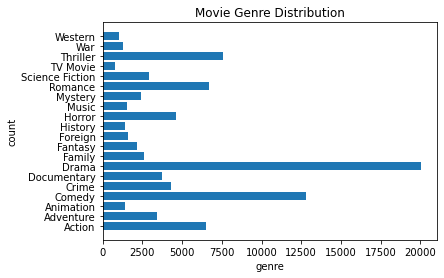

In [11]:
fig = plt.figure()
genres = types_of_genres
count = genre_counts
plt.barh(genres, count)
plt.title('Movie Genre Distribution')
plt.ylabel('count')
plt.xlabel('genre')
plt.show()

In [24]:
metainfo_data = pd.read_csv('cleaned-movies-metainformation.csv')

# We only need budget, id, and revenue, so let's drop all of the other columns.
metainfo_data.drop(['adult', 'belongs_to_collection', 'budget', 'original_language', 'popularity', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'title', 'vote_average', 'vote_count'], axis = 1, inplace = True)


# To make sure we still have enough data to work with after dropping all of these rows, let's check the size of our dataframe.
print(metainfo_data.size)
# Seems like we have enough data to work with even after all the drops.

# Proceed to check the first few columns of our dataframe.
metainfo_data.head()

131958


,genres,id,original_title
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,Toy Story
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,Jumanji
2,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,Grumpier Old Men
3,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,Waiting to Exhale
4,"[{'id': 35, 'name': 'Comedy'}]",11862,Father of the Bride Part II


In [18]:
ratings_data = pd.read_csv('ratings_small.csv')

# Let's get rid of the columns we don't need.
ratings_data.drop(['timestamp', 'userId'], axis = 1, inplace = True)

# Now we want to get rid of all the rows where rating is null or out of range. (The valid range for ratings_small.csv is between 0 and 5 inclusive.)
index_names = ratings_data[ratings_data['rating'].isnull() | (ratings_data['rating'] < 0) | (ratings_data['rating'] > 5)].index
metainfo_data.drop(index_names, inplace = True)

# Group by movieId to find the average rating for each movie.
ratings_grouped = ratings_data.groupby('movieId').mean().reset_index()

# Drop null values if any.
ratings_grouped.dropna()

# Let's examine the first few rows.
ratings_grouped.head()

,movieId,rating
0,1,3.872470
1,2,3.401869
2,3,3.161017
3,4,2.384615
4,5,3.267857


In [25]:
ratings_grouped.rename(columns={'movieId':'id'}, inplace=True)

# Make sure the two columns that we plan to merge together are of the same type.
metainfo_data['id'] = metainfo_data['id'].astype(str)
ratings_grouped['id'] = ratings_grouped['id'].astype(str)

# Finally, perform an inner join on the two tables.
merged_data = metainfo_data.merge(ratings_grouped, on='id', how='inner')

# Let's examine the first few columns.
merged_data.head()

,genres,id,original_title,rating
0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,Heat,3.593750
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",710,GoldenEye,1.500000
2,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",1408,Cutthroat Island,3.616279
3,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",524,Casino,3.555556
4,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",4584,Sense and Sensibility,5.000000


In [28]:
merged_data[merged_data['genres'].str.contains("Action")]['rating'].mean()

3.32117115501382

In [30]:
rating_average = []
for genre in types_of_genres:
    rating_average.append(merged_data[merged_data['genres'].str.contains(genre)]['rating'].mean())
rating_average
genre_ratings = pd.DataFrame()
genre_ratings['genre'] = types_of_genres
genre_ratings['rating'] = rating_average
genre_ratings

,genre,rating
0,Action,3.321171
1,Adventure,3.321950
2,Animation,3.221237
3,Comedy,3.343215
4,Crime,3.401296
5,Documentary,3.363793
6,Drama,3.333722
7,Family,3.367941
8,Fantasy,3.287275
9,Foreign,3.438911


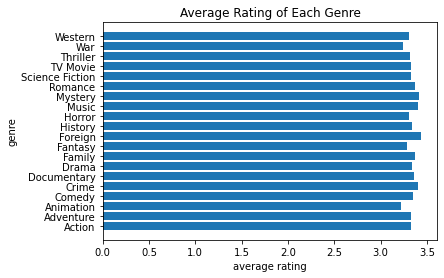

In [37]:
fig = plt.figure()
genre = types_of_genres
rating = rating_average
plt.barh(genre, rating)
plt.title('Average Rating of Each Genre')
plt.ylabel('genre')
plt.xlabel('average rating')
plt.show()